# Getting Collocates for Words

This shows how you can get collocates for a word. 

**Note:** It assumes you have the text in the same directory.

### Checking files and getting a text

First we check what texts we have in the directory.

In [4]:
%ls *.txt

Hume Enquiry.txt   negative.txt       positive.txt
Hume Treatise.txt  obama_tweets.txt


Now we open the text. 

Copy in the title of the text you want to process and run the next cell. Our example uses the plain text version of Hume's [A Treatise of Human Nature by David Hume](http://www.gutenberg.org/ebooks/4705) that we downloaded.

In [5]:
targetText = "Hume Treatise.txt"

with open(targetText, "r") as f:
    theText = f.read()

print("This string has", "{:,}".format(len(theText)), "characters")

This string has 1,344,061 characters


### Tokenizing

Note that we are tokenizing the full Gutenberg text file which includes metadata and license information. If you want only the tokens of the book you should delete the Gutenberg information from the text file.

In [17]:
import re
theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
print(theTokens[:10])

['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']


### Finding the collocates

This will ask you what words you want collocates for create a list of collocates. Note that you can have more than one target word. The list of words you want should be separated by spaces.

In [20]:
wrds2find = input("What word do you want collocates for?").split(" ") # Ask for the words to search for
print(wrds2find)

What word do you want collocates for?one two
['one', 'two']


This is the main loop that goes through the text and pulls collocates. Note that you can set the context of collocates before and after the target word separately.

In [21]:
contextBefore = 1 # This sets the context of words before the target word
contextAfter = 0 # This sets the context of words after the target word

end = len(theTokens)
counter = 0
theCollocates = []
for word in theTokens:
    if word in wrds2find: # This checks to see if the word is what we want
        for i in range(contextBefore):
            if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                theCollocates.append(theTokens[(counter - (i + 1))]) # This adds words before
        for i in range(contextAfter):
            if (counter + (i + 1)) < end: # This checks that we aren't at the end
                theCollocates.append(theTokens[(counter + (i + 1))]) # This adds words after
    counter = counter + 1
    
print(theCollocates[:30])

['one']


## Doing things with the collocates

Now we can do various things with the list of collocates.

#### Count collocates

In [9]:
print(len(theCollocates))

71


#### Count unique words among collocates

In [10]:
print(set(theCollocates))

{'same', 'no', 'passions', 'its', 'of', 'why', 'with', 'which', 'certain', 'at', 'undoubted', 'beside', 'concerning', 'the', 'if', 'render', 'like', 'as', 'following', 'confusion', 'betwixt', 'to', 'evident', 'that', 'this', 'falshood', 'any'}


#### Tabulate top collocates

In [13]:
import nltk
tokenDist = nltk.FreqDist(theCollocates)
tokenDist.tabulate(10)

      the        of        to      same      that      this       its       any following confusion 
       20        14         5         3         3         3         2         2         1         1 


#### Plot top collocates

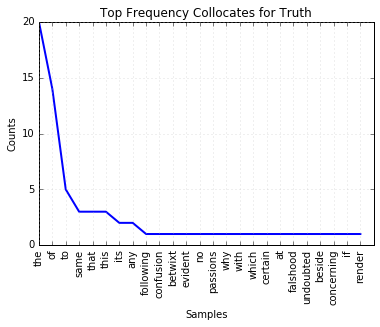

In [14]:
import matplotlib
%matplotlib inline
tokenDist.plot(25, title="Top Frequency Collocates for " + wrd2find.capitalize())

#### Explort all collocates and counts as a CSV

This will create CSV file with the name of the target word with the counts.

In [63]:
import csv
nameOfResults = wrd2find.capitalize() + ".Collocates.csv"
table = tokenDist.most_common()

with open(nameOfResults, "w") as f:
    writer = csv.writer(f)
    writer.writerows(table)
    
print("Done")

Done


---
[CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/) From [The Art of Literary Text Analysis](ArtOfLiteraryTextAnalysis.ipynb) by [Stéfan Sinclair](http://stefansinclair.name) &amp; [Geoffrey Rockwell](http://geoffreyrockwell.com)<br >Created January 7, 2015 and last modified August 8, 2016 (Jupyter 4.2.1)